In [1]:
import json

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns

In [2]:
f = open('nba-movement-data/data/0021500577.json',)
data = json.load(f)

In [3]:
data.keys()

[u'gamedate', u'gameid', u'events']

In [4]:
data['gameid']

u'0021500577'

In [5]:
data['gamedate']

u'2016-01-13'

In [6]:
len(data['events'])

469

In [7]:
EVENT_ID = 0

In [8]:
data['events'][EVENT_ID].keys()

[u'eventId', u'visitor', u'moments', u'home']

In [9]:
data['events'][EVENT_ID]['eventId']

u'1'

In [10]:
data['events'][EVENT_ID]['visitor']

{u'abbreviation': u'ATL',
 u'name': u'Atlanta Hawks',
 u'players': [{u'firstname': u'Jeff',
   u'jersey': u'0',
   u'lastname': u'Teague',
   u'playerid': 201952,
   u'position': u'G'},
  {u'firstname': u'Paul',
   u'jersey': u'4',
   u'lastname': u'Millsap',
   u'playerid': 200794,
   u'position': u'F'},
  {u'firstname': u'Justin',
   u'jersey': u'7',
   u'lastname': u'Holiday',
   u'playerid': 203200,
   u'position': u'G'},
  {u'firstname': u'Shelvin',
   u'jersey': u'8',
   u'lastname': u'Mack',
   u'playerid': 202714,
   u'position': u'G'},
  {u'firstname': u'Tim',
   u'jersey': u'10',
   u'lastname': u'Hardaway Jr.',
   u'playerid': 203501,
   u'position': u'G'},
  {u'firstname': u'Tiago',
   u'jersey': u'11',
   u'lastname': u'Splitter',
   u'playerid': 201168,
   u'position': u'C-F'},
  {u'firstname': u'Al',
   u'jersey': u'15',
   u'lastname': u'Horford',
   u'playerid': 201143,
   u'position': u'C-F'},
  {u'firstname': u'Dennis',
   u'jersey': u'17',
   u'lastname': u'Schroder

In [11]:
visitor = data['events'][EVENT_ID]['visitor']

In [12]:
home = data['events'][EVENT_ID]['home']

In [13]:
len(data['events'][EVENT_ID]['moments'])

103

In [14]:
data['events'][EVENT_ID]['moments'][0]

[1,
 1452730210005,
 710.42,
 16.9,
 None,
 [[-1, -1, 34.03194, 29.88978, 1.33122],
  [1610612766, 101107, 13.84921, 17.4751, 0.0],
  [1610612766, 201587, 31.08585, 26.80877, 0.0],
  [1610612766, 202689, 8.37396, 22.86151, 0.0],
  [1610612766, 203469, 10.31474, 29.9676, 0.0],
  [1610612766, 203798, 6.36089, 21.05661, 0.0],
  [1610612737, 2594, 7.32389, 19.45269, 0.0],
  [1610612737, 200794, 16.11757, 9.79316, 0.0],
  [1610612737, 201143, 11.54238, 31.35123, 0.0],
  [1610612737, 201952, 4.71388, 13.45755, 0.0],
  [1610612737, 203145, 32.7445, 28.22546, 0.0]]]

In [15]:
moments = data['events'][EVENT_ID]['moments']

In [16]:
# Column labels
headers = ["team_id", "player_id", "x_loc", "y_loc", 
           "radius", "moment", "game_clock", "shot_clock"]

In [17]:
# Initialize our new list
player_moments = []

for moment in moments:
    # For each player/ball in the list found within each moment
    for player in moment[5]:
        # Add additional information to each player/ball
        # This info includes the index of each moment, the game clock
        # and shot clock values for each moment
        player.extend((moments.index(moment), moment[2], moment[3]))
        player_moments.append(player)

In [18]:
# inspect our list
player_moments[0:11]

[[-1, -1, 34.03194, 29.88978, 1.33122, 0, 710.42, 16.9],
 [1610612766, 101107, 13.84921, 17.4751, 0.0, 0, 710.42, 16.9],
 [1610612766, 201587, 31.08585, 26.80877, 0.0, 0, 710.42, 16.9],
 [1610612766, 202689, 8.37396, 22.86151, 0.0, 0, 710.42, 16.9],
 [1610612766, 203469, 10.31474, 29.9676, 0.0, 0, 710.42, 16.9],
 [1610612766, 203798, 6.36089, 21.05661, 0.0, 0, 710.42, 16.9],
 [1610612737, 2594, 7.32389, 19.45269, 0.0, 0, 710.42, 16.9],
 [1610612737, 200794, 16.11757, 9.79316, 0.0, 0, 710.42, 16.9],
 [1610612737, 201143, 11.54238, 31.35123, 0.0, 0, 710.42, 16.9],
 [1610612737, 201952, 4.71388, 13.45755, 0.0, 0, 710.42, 16.9],
 [1610612737, 203145, 32.7445, 28.22546, 0.0, 0, 710.42, 16.9]]

In [19]:
df = pd.DataFrame(player_moments, columns=headers)

In [20]:
df.head()

,team_id,player_id,x_loc,y_loc,radius,moment,game_clock,shot_clock
0,-1,-1,34.03194,29.88978,1.33122,0,710.42,16.9
1,1610612766,101107,13.84921,17.47510,0.00000,0,710.42,16.9
2,1610612766,201587,31.08585,26.80877,0.00000,0,710.42,16.9
3,1610612766,202689,8.37396,22.86151,0.00000,0,710.42,16.9
4,1610612766,203469,10.31474,29.96760,0.00000,0,710.42,16.9


In [21]:
# creates the players list with the home players
players = home["players"]
# Then add on the visiting players
players.extend(visitor["players"])

In [22]:
# initialize new dictionary
id_dict = {}

# Add the values we want
for player in players:
    id_dict[player['playerid']] = [player["firstname"]+" "+player["lastname"],
                                   player["jersey"]]

In [23]:
id_dict

{2594: [u'Kyle Korver', u'26'],
 101107: [u'Marvin Williams', u'2'],
 200757: [u'Thabo Sefolosha', u'25'],
 200794: [u'Paul Millsap', u'4'],
 201143: [u'Al Horford', u'15'],
 201150: [u'Spencer Hawes', u'00'],
 201168: [u'Tiago Splitter', u'11'],
 201587: [u'Nicolas Batum', u'5'],
 201946: [u'Tyler Hansbrough', u'50'],
 201952: [u'Jeff Teague', u'0'],
 202391: [u'Jeremy Lin', u'7'],
 202689: [u'Kemba Walker', u'15'],
 202714: [u'Shelvin Mack', u'8'],
 203087: [u'Jeremy Lamb', u'3'],
 203118: [u'Mike Scott', u'32'],
 203145: [u'Kent Bazemore', u'24'],
 203148: [u'Brian Roberts', u'22'],
 203200: [u'Justin Holiday', u'7'],
 203469: [u'Cody Zeller', u'40'],
 203471: [u'Dennis Schroder', u'17'],
 203488: [u'Mike Muscala', u'31'],
 203501: [u'Tim Hardaway Jr.', u'10'],
 203584: [u'Troy Daniels', u'30'],
 203798: [u'PJ Hairston', u'19'],
 1626151: [u'Aaron Harrison', u'9'],
 1626163: [u'Frank Kaminsky', u'44']}

In [24]:
id_dict.update({-1: ['ball', np.nan]})

In [25]:
df["player_name"] = df.player_id.map(lambda x: id_dict[x][0])
df["player_jersey"] = df.player_id.map(lambda x: id_dict[x][1])

In [26]:
df.head()

,team_id,player_id,x_loc,y_loc,radius,moment,game_clock,shot_clock,player_name,player_jersey
0,-1,-1,34.03194,29.88978,1.33122,0,710.42,16.9,ball,NaN
1,1610612766,101107,13.84921,17.47510,0.00000,0,710.42,16.9,Marvin Williams,2
2,1610612766,201587,31.08585,26.80877,0.00000,0,710.42,16.9,Nicolas Batum,5
3,1610612766,202689,8.37396,22.86151,0.00000,0,710.42,16.9,Kemba Walker,15
4,1610612766,203469,10.31474,29.96760,0.00000,0,710.42,16.9,Cody Zeller,40


In [27]:
# get walker's movements
walker = df[df.player_name=="Kemba Walker"]

In [28]:
walker.head()

,team_id,player_id,x_loc,y_loc,radius,moment,game_clock,shot_clock,player_name,player_jersey
3,1610612766,202689,8.37396,22.86151,0.0,0,710.42,16.90,Kemba Walker,15
14,1610612766,202689,8.70068,22.45731,0.0,1,710.38,16.86,Kemba Walker,15
25,1610612766,202689,9.00190,22.05031,0.0,2,710.34,16.82,Kemba Walker,15
36,1610612766,202689,9.29273,21.61112,0.0,3,710.30,16.78,Kemba Walker,15
47,1610612766,202689,9.65163,21.19484,0.0,4,710.27,16.74,Kemba Walker,15


In [29]:
# Function to draw the basketball court lines
def draw_court(ax=None, color="gray", lw=1, zorder=0):
    
    if ax is None:
        ax = plt.gca()

    # Creates the out of bounds lines around the court
    outer = Rectangle((0,-50), width=94, height=50, color=color,
                      zorder=zorder, fill=False, lw=lw)

    # The left and right basketball hoops
    l_hoop = Circle((5.35,-25), radius=.75, lw=lw, fill=False, 
                    color=color, zorder=zorder)
    r_hoop = Circle((88.65,-25), radius=.75, lw=lw, fill=False,
                    color=color, zorder=zorder)
    
    # Left and right backboards
    l_backboard = Rectangle((4,-28), 0, 6, lw=lw, color=color,
                            zorder=zorder)
    r_backboard = Rectangle((90, -28), 0, 6, lw=lw,color=color,
                            zorder=zorder)

    # Left and right paint areas
    l_outer_box = Rectangle((0, -33), 19, 16, lw=lw, fill=False,
                            color=color, zorder=zorder)    
    l_inner_box = Rectangle((0, -31), 19, 12, lw=lw, fill=False,
                            color=color, zorder=zorder)
    r_outer_box = Rectangle((75, -33), 19, 16, lw=lw, fill=False,
                            color=color, zorder=zorder)

    r_inner_box = Rectangle((75, -31), 19, 12, lw=lw, fill=False,
                            color=color, zorder=zorder)

    # Left and right free throw circles
    l_free_throw = Circle((19,-25), radius=6, lw=lw, fill=False,
                          color=color, zorder=zorder)
    r_free_throw = Circle((75, -25), radius=6, lw=lw, fill=False,
                          color=color, zorder=zorder)

    # Left and right corner 3-PT lines
    # a represents the top lines
    # b represents the bottom lines
    l_corner_a = Rectangle((0,-3), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    l_corner_b = Rectangle((0,-47), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    r_corner_a = Rectangle((80, -3), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    r_corner_b = Rectangle((80, -47), 14, 0, lw=lw, color=color,
                           zorder=zorder)
    
    # Left and right 3-PT line arcs
    l_arc = Arc((5,-25), 47.5, 47.5, theta1=292, theta2=68, lw=lw,
                color=color, zorder=zorder)
    r_arc = Arc((89, -25), 47.5, 47.5, theta1=112, theta2=248, lw=lw,
                color=color, zorder=zorder)

    # half_court
    # ax.axvline(470)
    half_court = Rectangle((47,-50), 0, 50, lw=lw, color=color,
                           zorder=zorder)

    hc_big_circle = Circle((47, -25), radius=6, lw=lw, fill=False,
                           color=color, zorder=zorder)
    hc_sm_circle = Circle((47, -25), radius=2, lw=lw, fill=False,
                          color=color, zorder=zorder)

    court_elements = [l_hoop, l_backboard, l_outer_box, outer,
                      l_inner_box, l_free_throw, l_corner_a,
                      l_corner_b, l_arc, r_hoop, r_backboard, 
                      r_outer_box, r_inner_box, r_free_throw,
                      r_corner_a, r_corner_b, r_arc, half_court,
                      hc_big_circle, hc_sm_circle]

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

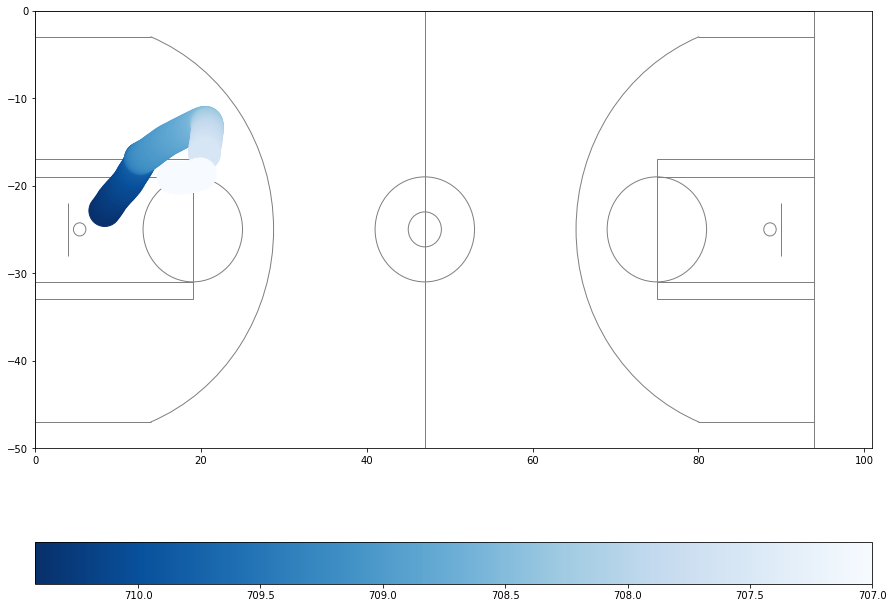

In [30]:
plt.figure(figsize=(15, 11.5))

# Plot the movemnts as scatter plot
# using a colormap to show change in game clock
plt.scatter(walker.x_loc, -walker.y_loc, c=walker.game_clock,
            cmap=plt.cm.Blues, s=1000, zorder=1)
# Darker colors represent moments earlier on in the game
cbar = plt.colorbar(orientation="horizontal")
# invert the colorbar to have higher numbers on the left
cbar.ax.invert_xaxis()

draw_court()

plt.xlim(0, 101)
plt.ylim(-50, 0)
plt.show()

In [43]:
class PlotPlayerEventMovement:
    def __init__(self, gameid, eventid):
        self.gameid = gameid
        self.f = open('nba-movement-data/data/{}.json'.format(gameid),)
        self.data = json.load(self.f)
        self.moments = self.data['events'][eventid]['moments']
        self.f.close()
        # creates the players list with the home players
        home_players = self.data['events'][eventid]['home']['players']
        # Then add on the visiting players
        away_players = self.data['events'][eventid]['visitor']['players']
        # initialize new dictionary
        id_dict = {}

        # Add the values we want
        for player in home_players:
            id_dict[player['playerid']] = [player["firstname"]+" "+player["lastname"],
                                           player["jersey"],
                                           'home']
        for player in away_players:
            id_dict[player['playerid']] = [player["firstname"]+" "+player["lastname"],
                                           player["jersey"],
                                           'visitor']

        id_dict.update({-1: ['ball', np.nan, np.nan]})
        self.player_ids = id_dict
        
         # Column labels
        headers = ["team_id", "player_id", "x_loc", "y_loc", 
               "radius", "moment", "game_clock", "shot_clock"]


        # Initialize our new list
        player_moments = []

        for moment in self.moments:
            # For each player/ball in the list found within each moment
            for player in moment[5]:
                # Add additional information to each player/ball
                # This info includes the index of each moment, the game clock
                # and shot clock values for each moment
                player.extend((self.moments.index(moment), moment[2], moment[3]))
                player_moments.append(player)

        df = pd.DataFrame(player_moments, columns=headers)

        df["player_name"] = df.player_id.map(lambda x: id_dict[x][0])
        df["player_jersey"] = df.player_id.map(lambda x: id_dict[x][1])
        
        self.event_df = df

    def plot_event(self):
        player_names = []
        legend_plots = []
        plt.figure(figsize=(15, 11.5))
        
        for player_id in self.player_ids.keys():
            player_names.append(self.player_ids[player_id][0])
            player_movement = self.event_df[self.event_df.player_id==player_id]
            
            if self.player_ids[player_id][2] == 'home':
                legend_plots.append(plt.scatter(player_movement.x_loc, -player_movement.y_loc, c=player_movement.game_clock,
                    cmap=plt.cm.Blues, s=100, zorder=1, label=self.player_ids[player_id][0]))
            elif self.player_ids[player_id][2] == 'visitor':
                legend_plots.append(plt.scatter(player_movement.x_loc, -player_movement.y_loc, c=player_movement.game_clock,
                    cmap=plt.cm.Greens, s=100, zorder=1, label=self.player_ids[player_id][0]))
            else:
                legend_plots.append(plt.scatter(player_movement.x_loc, -player_movement.y_loc, c=player_movement.game_clock,
                    cmap=plt.cm.Oranges, s=50, zorder=1, label=self.player_ids[player_id][0]))
        
        cbar = plt.colorbar(orientation="horizontal")
        plt.legend()
        
        cbar.ax.invert_xaxis()

        draw_court()

        plt.xlim(0, 101)
        plt.ylim(-50, 0)
        plt.show()
        
    def plot_player(self, playername):
        # get player's movements
        player_movement = self.event_df[self.event_df.player_name==playername]
        
        plt.figure(figsize=(15, 11.5))

        # Plot the movemnts as scatter plot
        # using a colormap to show change in game clock
        plt.scatter(player_movement.x_loc, -player_movement.y_loc, c=player_movement.game_clock,
                    cmap=plt.cm.Blues, s=1000, zorder=1)
        # Darker colors represent moments earlier on in the game
        cbar = plt.colorbar(orientation="horizontal")
        # invert the colorbar to have higher numbers on the left
        cbar.ax.invert_xaxis()

        draw_court()

        plt.xlim(0, 101)
        plt.ylim(-50, 0)
        plt.show()

In [44]:
event_plot = PlotPlayerEventMovement("0021500577", 100)

In [45]:
event_plot.player_ids

{-1: ['ball', nan, nan],
 2594: [u'Kyle Korver', u'26', 'visitor'],
 101107: [u'Marvin Williams', u'2', 'home'],
 200757: [u'Thabo Sefolosha', u'25', 'visitor'],
 200794: [u'Paul Millsap', u'4', 'visitor'],
 201143: [u'Al Horford', u'15', 'visitor'],
 201150: [u'Spencer Hawes', u'00', 'home'],
 201168: [u'Tiago Splitter', u'11', 'visitor'],
 201587: [u'Nicolas Batum', u'5', 'home'],
 201946: [u'Tyler Hansbrough', u'50', 'home'],
 201952: [u'Jeff Teague', u'0', 'visitor'],
 202391: [u'Jeremy Lin', u'7', 'home'],
 202689: [u'Kemba Walker', u'15', 'home'],
 202714: [u'Shelvin Mack', u'8', 'visitor'],
 203087: [u'Jeremy Lamb', u'3', 'home'],
 203118: [u'Mike Scott', u'32', 'visitor'],
 203145: [u'Kent Bazemore', u'24', 'visitor'],
 203148: [u'Brian Roberts', u'22', 'home'],
 203200: [u'Justin Holiday', u'7', 'visitor'],
 203469: [u'Cody Zeller', u'40', 'home'],
 203471: [u'Dennis Schroder', u'17', 'visitor'],
 203488: [u'Mike Muscala', u'31', 'visitor'],
 203501: [u'Tim Hardaway Jr.', u'10

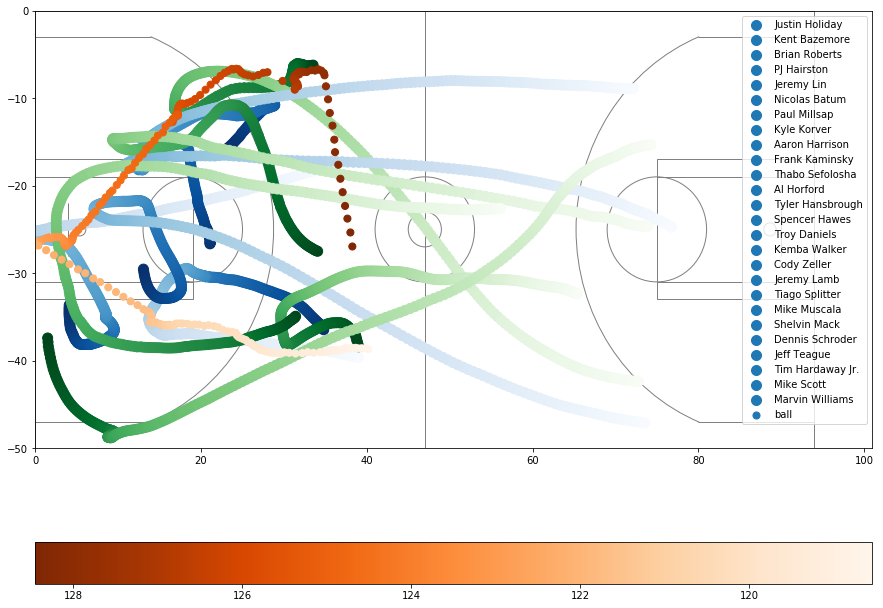

In [46]:
event_plot.plot_event()

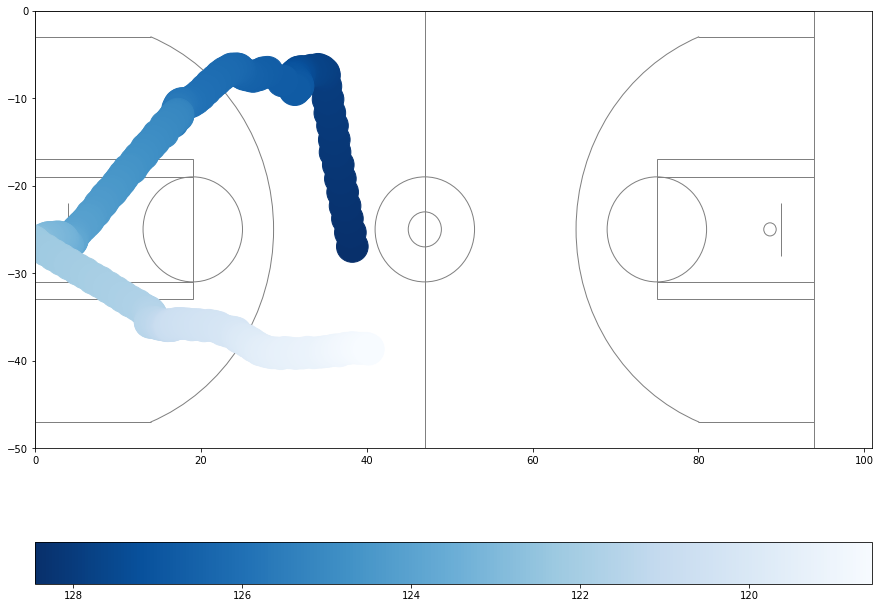

In [48]:
event_plot.plot_player('ball')